In [1]:
from GmGM.synthetic import DatasetGenerator
from GmGM.synthetic import PrecMatGenerator, PrecMatErdosRenyiGilbert
from GmGM.synthetic import measure_prec_recall, plot_prec_recall
from GmGM import GmGM
from TeraLasso import TeraLasso
from EiGLasso import EiGLasso

from statistics import median
import numpy as np

# Main Paper

## 2-axis normal

In [2]:
generator = DatasetGenerator(
    structure={
        "dataset": ("axis_0", "axis_1"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
    },
)
generator

<DatasetGenerator, structure=
	dataset: ('', 'axis_0', 'axis_1')
size=
	axis_0: 50
	axis_1: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	dataset: <Normal Distribution>
>

Attempt 1/20
Attempt 2/20
Attempt 3/20
Attempt 4/20
Attempt 5/20
Attempt 6/20
Attempt 7/20
Attempt 8/20
Attempt 9/20
Attempt 10/20
Attempt 11/20
Attempt 12/20
Attempt 13/20
Attempt 14/20
Attempt 15/20
Attempt 16/20
Attempt 17/20
Attempt 18/20
Attempt 19/20
Attempt 20/20


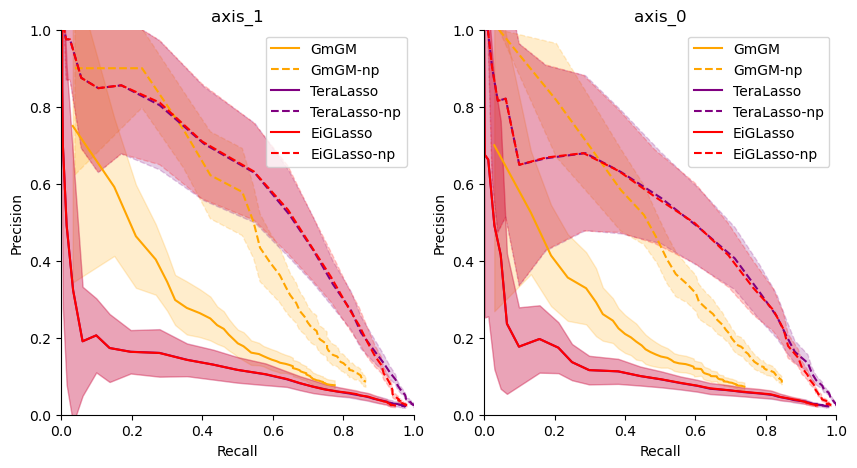

In [3]:
nlambdas = 50
results_1 = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "TeraLasso": lambda dataset, lambdas: TeraLasso(dataset, lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset, lambdas, use_nonparanormal_skeptic=True),
        "EiGLasso": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas),
        "EiGLasso-np": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.2, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 0, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
        "EiGLasso": 10**np.linspace(-2, 0, nlambdas),
        "EiGLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=20,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
fig_1, ax_1 = plot_prec_recall(
    results_1,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
        "EiGLasso": "red",
        "EiGLasso-np": "red",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
        "EiGLasso": "-",
        "EiGLasso-np": "--",
    }
)
fig_1.savefig("out_figs/prec_recall_2_axis_1_modality_normal.pdf", bbox_inches="tight")

## 3-axis normal

In [4]:
generator = DatasetGenerator(
    structure={
        "dataset": ("axis_0", "axis_1", "axis_2"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_2": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
        "axis_2": 50,
    },
)
generator

<DatasetGenerator, structure=
	dataset: ('', 'axis_0', 'axis_1', 'axis_2')
size=
	axis_0: 50
	axis_1: 50
	axis_2: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_2: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	dataset: <Normal Distribution>
>

Attempt 1/20
Attempt 2/20
Attempt 3/20
Attempt 4/20
Attempt 5/20
Attempt 6/20
Attempt 7/20
Attempt 8/20
Attempt 9/20
Attempt 10/20
Attempt 11/20
Attempt 12/20
Attempt 13/20
Attempt 14/20
Attempt 15/20
Attempt 16/20
Attempt 17/20
Attempt 18/20
Attempt 19/20
Attempt 20/20


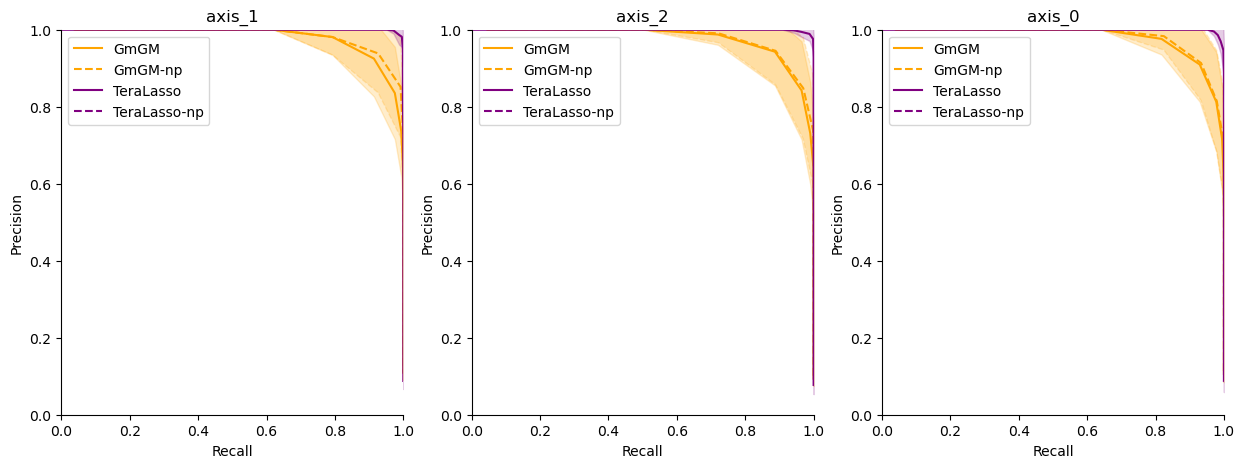

In [5]:
nlambdas = 50
results_2 = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "TeraLasso": lambda dataset, lambdas: TeraLasso(dataset, lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.2, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 0, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=20,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
fig_2, ax_2 = plot_prec_recall(
    results_2,
    figsize=(15, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
    }
)
fig_2.savefig("out_figs/prec_recall_3_axis_1_modality_normal.pdf", bbox_inches="tight")

## 2-axis ziln

In [6]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "dataset": ("axis_0", "axis_1"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
    },
    distribution=ZiLNDistribution(np.random.uniform(size=(50)).reshape(1, 50))
)
generator

<DatasetGenerator, structure=
	dataset: ('', 'axis_0', 'axis_1')
size=
	axis_0: 50
	axis_1: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	dataset: <ZiLN Distribution, truncation=[[0.4464301  0.65732324 0.85481072 0.94626711 0.88452167 0.2813002
  0.4002836  0.07850831 0.66483189 0.73235819 0.43307896 0.64425522
  0.72730853 0.71489843 0.50493001 0.26090135 0.88504913 0.4347148
  0.7596899  0.60345904 0.64152419 0.09661793 0.0203857  0.23066006
  0.93794107 0.24306797 0.92452562 0.80361406 0.55125409 0.75866299
  0.82720582 0.42096254 0.24040453 0.53275878 0.78381901 0.18099686
  0.0556064  0.53465176 0.85794142 0.13040538 0.92321796 0.48377481
  0.77326436 0.17820116 0.48395208 0.13854703 0.61179055 0.62828093
  0.32909637 0.33098407]]>
>

Attempt 1/20
Attempt 2/20
Attempt 3/20
Attempt 4/20
Attempt 5/20
Attempt 6/20
Attempt 7/20
Attempt 8/20
Attempt 9/20
Attempt 10/20
Attempt 11/20
Attempt 12/20
Attempt 13/20
Attempt 14/20
Attempt 15/20
Attempt 16/20
Attempt 17/20
Attempt 18/20
Attempt 19/20
Attempt 20/20


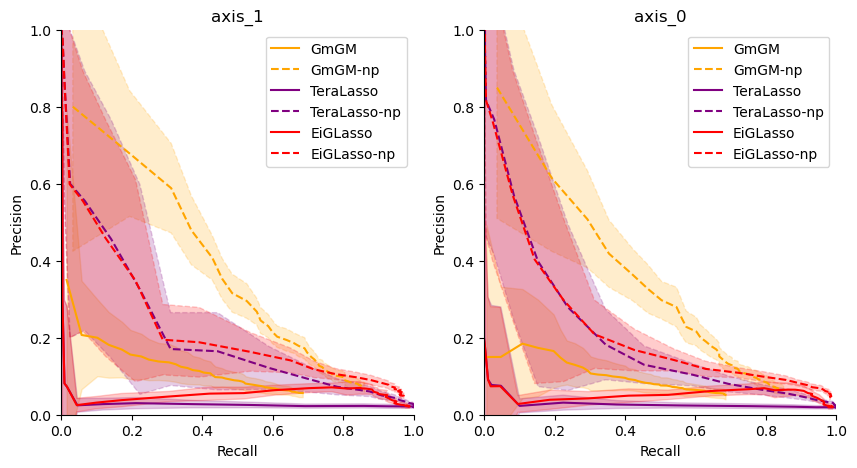

In [7]:
nlambdas = 50
results_3 = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "TeraLasso": lambda dataset, lambdas: TeraLasso(dataset, lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset, lambdas, use_nonparanormal_skeptic=True),
        "EiGLasso": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas),
        "EiGLasso-np": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.25, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.25, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 1, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
        "EiGLasso": 10**np.linspace(-2, 1, nlambdas),
        "EiGLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=20,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
fig_3, ax_3 = plot_prec_recall(
    results_3,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
        "EiGLasso": "red",
        "EiGLasso-np": "red",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
        "EiGLasso": "-",
        "EiGLasso-np": "--",
    }
)
fig_3.savefig("out_figs/prec_recall_2_axis_1_modality_ziln.pdf", bbox_inches="tight")

## 2-modality, 1 shared normal

In [8]:
generator = DatasetGenerator(
    structure={
        "dataset_0": ("axis_0", "shared"),
        "dataset_1": ("axis_1", "shared"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "shared": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
        "shared": 50,
    },
)
generator

<DatasetGenerator, structure=
	dataset_0: ('', 'axis_0', 'shared')
	dataset_1: ('', 'axis_1', 'shared')
size=
	axis_0: 50
	axis_1: 50
	shared: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	shared: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	dataset_0: <Normal Distribution>
	dataset_1: <Normal Distribution>
>

Attempt 1/20
Attempt 2/20
Attempt 3/20
Attempt 4/20
Attempt 5/20
Attempt 6/20
Attempt 7/20
Attempt 8/20
Attempt 9/20
Attempt 10/20
Attempt 11/20
Attempt 12/20
Attempt 13/20
Attempt 14/20
Attempt 15/20
Attempt 16/20
Attempt 17/20
Attempt 18/20
Attempt 19/20
Attempt 20/20


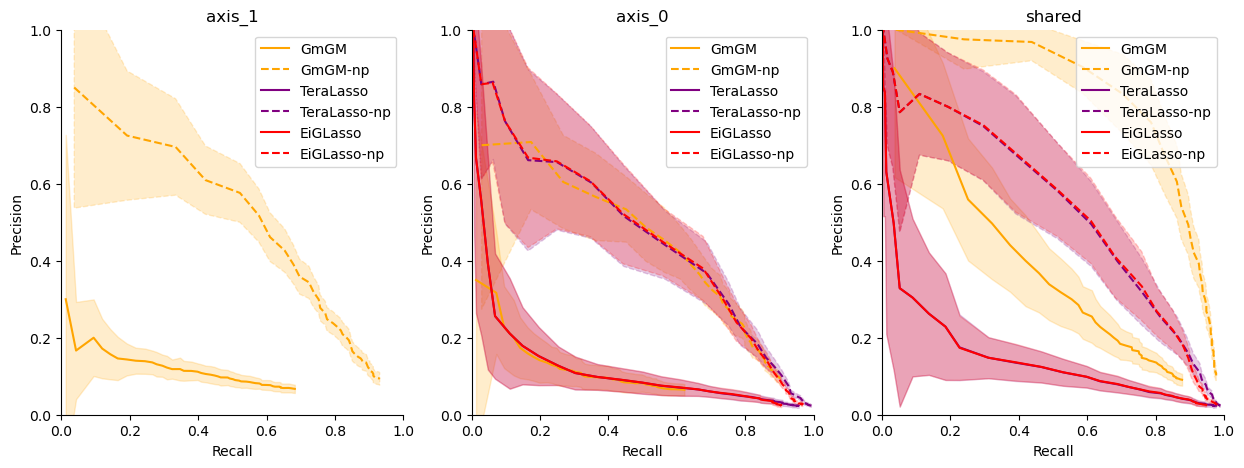

In [9]:
nlambdas = 50
results_4 = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "TeraLasso": lambda dataset, lambdas: TeraLasso(dataset["dataset_0"], lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset["dataset_0"], lambdas, use_nonparanormal_skeptic=True),
        "EiGLasso": lambda dataset, lambdas: EiGLasso(dataset["dataset_0"], lambdas, lambdas),
        "EiGLasso-np": lambda dataset, lambdas: EiGLasso(dataset["dataset_0"], lambdas, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.2, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 0, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
        "EiGLasso": 10**np.linspace(-2, 0, nlambdas),
        "EiGLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=20,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
fig_4, ax_4 = plot_prec_recall(
    results_4,
    figsize=(15, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
        "EiGLasso": "red",
        "EiGLasso-np": "red",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
        "EiGLasso": "-",
        "EiGLasso-np": "--",
    }
)
fig_4.savefig("out_figs/prec_recall_2_axis_2_modality_shared.pdf", bbox_inches="tight")

# Extra Tests

## 10 Sample 2-axis normal

In [11]:
generator = DatasetGenerator(
    structure={
        "dataset": ("axis_0", "axis_1"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
    },
)
generator

<DatasetGenerator, structure=
	dataset: ('', 'axis_0', 'axis_1')
size=
	axis_0: 50
	axis_1: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	dataset: <Normal Distribution>
>

Attempt 1/20
Attempt 2/20
Attempt 3/20
Attempt 4/20
Attempt 5/20
Attempt 6/20
Attempt 7/20
Attempt 8/20
Attempt 9/20
Attempt 10/20
Attempt 11/20
Attempt 12/20
Attempt 13/20
Attempt 14/20
Attempt 15/20
Attempt 16/20
Attempt 17/20
Attempt 18/20
Attempt 19/20
Attempt 20/20


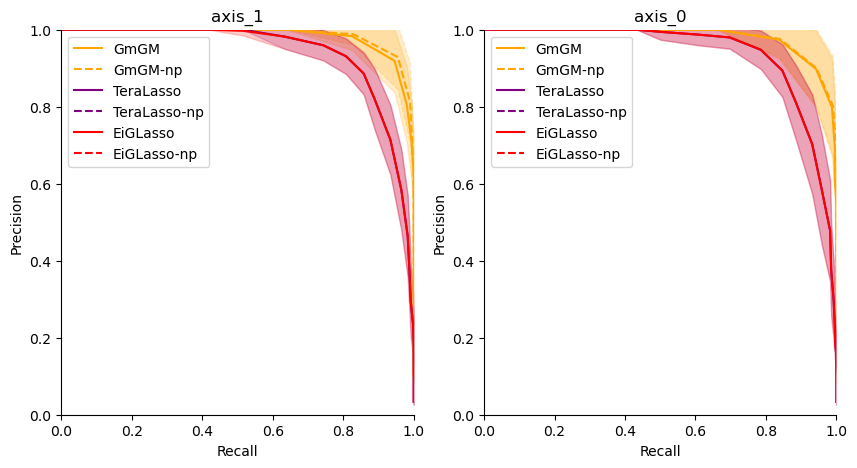

In [12]:
nlambdas = 50
results_sup_1 = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "TeraLasso": lambda dataset, lambdas: TeraLasso(dataset, lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset, lambdas, use_nonparanormal_skeptic=True),
        "EiGLasso": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas),
        "EiGLasso-np": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.2, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 0, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
        "EiGLasso": 10**np.linspace(-2, 0, nlambdas),
        "EiGLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=20,
    num_samples=10,
    verbose=1,
    fail_gracefully=False
)
fig_sup_1, ax_sup_1 = plot_prec_recall(
    results_sup_1,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
        "EiGLasso": "red",
        "EiGLasso-np": "red",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
        "EiGLasso": "-",
        "EiGLasso-np": "--",
    }
)
fig_sup_1.savefig("out_figs/prec_recall_2_axis_1_modality_normal_10_samples.pdf", bbox_inches="tight")

## AR(1) 2-axis

In [13]:
from GmGM.synthetic import PrecMatAutoregressive

In [14]:
generator = DatasetGenerator(
    structure={
        "dataset": ("axis_0", "axis_1"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatAutoregressive(p=1),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatAutoregressive(p=1),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
    },
)
generator

<DatasetGenerator, structure=
	dataset: ('', 'axis_0', 'axis_1')
size=
	axis_0: 50
	axis_1: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatAutoregressive(p=1)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatAutoregressive(p=1)>
axis_join=
	Kronecker Sum
distribution=
	dataset: <Normal Distribution>
>

Attempt 1/20
Attempt 2/20
Attempt 3/20
Attempt 4/20
Attempt 5/20
Attempt 6/20
Attempt 7/20
Attempt 8/20
Attempt 9/20
Attempt 10/20
Attempt 11/20
Attempt 12/20
Attempt 13/20
Attempt 14/20
Attempt 15/20
Attempt 16/20
Attempt 17/20
Attempt 18/20
Attempt 19/20
Attempt 20/20


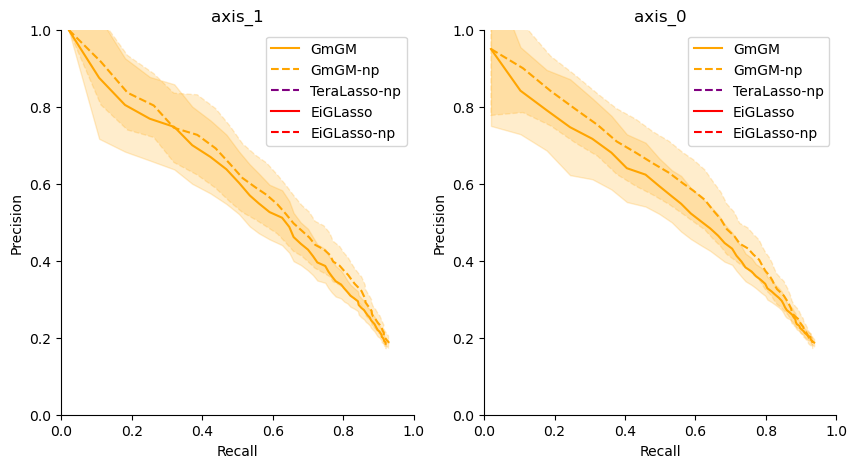

In [18]:
# "TeraLasso" ommitted because it seemed to take very very long compared to others.
nlambdas = 50
results_sup_2 = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        #"TeraLasso": lambda dataset, lambdas: TeraLasso(dataset, lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset, lambdas, use_nonparanormal_skeptic=True),
        "EiGLasso": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas),
        "EiGLasso-np": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.2, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 0, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
        "EiGLasso": 10**np.linspace(-2, 0, nlambdas),
        "EiGLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=20,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
fig_sup_2, ax_sup_2 = plot_prec_recall(
    results_sup_2,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
        "EiGLasso": "red",
        "EiGLasso-np": "red",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
        "EiGLasso": "-",
        "EiGLasso-np": "--",
    }
)
fig_sup_2.savefig("out_figs/prec_recall_2_axis_1_modality_normal_autoregressive.pdf", bbox_inches="tight")

## Denser

In [19]:
generator = DatasetGenerator(
    structure={
        "dataset": ("axis_0", "axis_1"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.2),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.2),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
    },
)
generator

<DatasetGenerator, structure=
	dataset: ('', 'axis_0', 'axis_1')
size=
	axis_0: 50
	axis_1: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.2)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.2)>
axis_join=
	Kronecker Sum
distribution=
	dataset: <Normal Distribution>
>

Attempt 1/20
Attempt 2/20
Attempt 3/20
Attempt 4/20
Attempt 5/20
Attempt 6/20
Attempt 7/20
Attempt 8/20
Attempt 9/20
Attempt 10/20
Attempt 11/20
Attempt 12/20
Attempt 13/20
Attempt 14/20
Attempt 15/20
Attempt 16/20
Attempt 17/20
Attempt 18/20
Attempt 19/20
Attempt 20/20


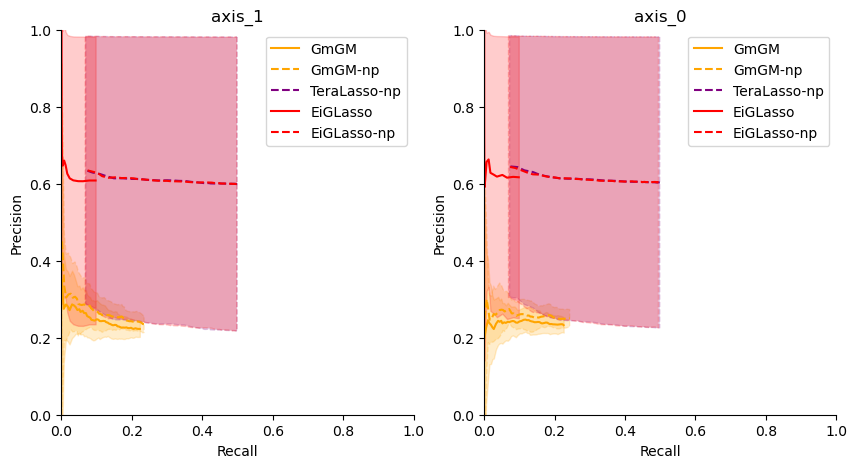

In [23]:
nlambdas = 50
results_sup_3 = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        #"TeraLasso": lambda dataset, lambdas: TeraLasso(dataset, lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset, lambdas, use_nonparanormal_skeptic=True),
        "EiGLasso": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas),
        "EiGLasso-np": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.2, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 0, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
        "EiGLasso": 10**np.linspace(-2, 0, nlambdas),
        "EiGLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=20,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
fig_sup_3, ax_sup_3 = plot_prec_recall(
    results_sup_3,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
        "EiGLasso": "red",
        "EiGLasso-np": "red",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
        "EiGLasso": "-",
        "EiGLasso-np": "--",
    }
)
fig_sup_3.savefig("out_figs/prec_recall_2_axis_1_modality_normal_denser.pdf", bbox_inches="tight")

## Kronecker product

In [24]:
generator = DatasetGenerator(
    structure={
        "dataset": ("axis_0", "axis_1"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
    },
    axis_join="Kronecker Product"
)
generator

<DatasetGenerator, structure=
	dataset: ('', 'axis_0', 'axis_1')
size=
	axis_0: 50
	axis_1: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Product
distribution=
	dataset: <Normal Distribution>
>

Attempt 1/20
Attempt 2/20
Attempt 3/20
Attempt 4/20
Attempt 5/20
Attempt 6/20
Attempt 7/20
Attempt 8/20
Attempt 9/20
Attempt 10/20
Attempt 11/20
Attempt 12/20
Attempt 13/20
Attempt 14/20
Attempt 15/20
Attempt 16/20
Attempt 17/20
Attempt 18/20
Attempt 19/20
Attempt 20/20


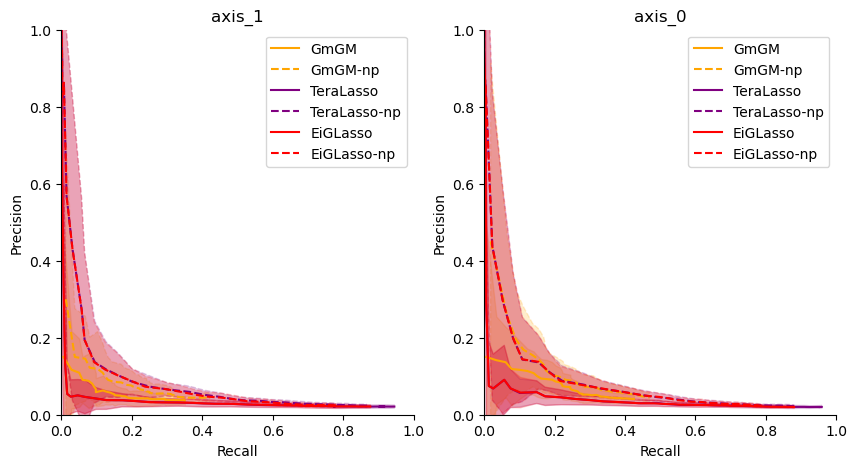

In [25]:
nlambdas = 50
results_sup_4 = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "TeraLasso": lambda dataset, lambdas: TeraLasso(dataset, lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset, lambdas, use_nonparanormal_skeptic=True),
        "EiGLasso": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas),
        "EiGLasso-np": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.2, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 0, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
        "EiGLasso": 10**np.linspace(-2, 0, nlambdas),
        "EiGLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=20,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
fig_sup_4, ax_sup_4 = plot_prec_recall(
    results_sup_4,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
        "EiGLasso": "red",
        "EiGLasso-np": "red",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
        "EiGLasso": "-",
        "EiGLasso-np": "--",
    }
)
fig_sup_4.savefig("out_figs/prec_recall_2_axis_1_modality_normal_kp.pdf", bbox_inches="tight")

## Larger

In [26]:
generator = DatasetGenerator(
    structure={
        "dataset": ("axis_0", "axis_1"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "axis_0": 100,
        "axis_1": 100,
    },
)
generator

<DatasetGenerator, structure=
	dataset: ('', 'axis_0', 'axis_1')
size=
	axis_0: 100
	axis_1: 100
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	dataset: <Normal Distribution>
>

Attempt 1/20
Attempt 2/20
Attempt 3/20
Attempt 4/20
Attempt 5/20
Attempt 6/20
Attempt 7/20
Attempt 8/20
Attempt 9/20
Attempt 10/20
Attempt 11/20
Attempt 12/20
Attempt 13/20
Attempt 14/20
Attempt 15/20
Attempt 16/20
Attempt 17/20
Attempt 18/20
Attempt 19/20
Attempt 20/20


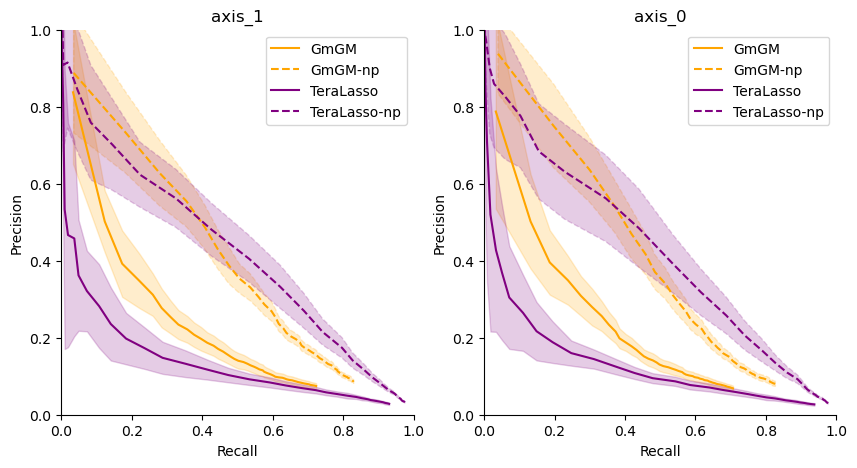

In [27]:
nlambdas = 50
results_sup_5 = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "TeraLasso": lambda dataset, lambdas: TeraLasso(dataset, lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset, lambdas, use_nonparanormal_skeptic=True),
        #"EiGLasso": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas),
        #"EiGLasso-np": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.2, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 0, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
        "EiGLasso": 10**np.linspace(-2, 0, nlambdas),
        "EiGLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=20,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
fig_sup_5, ax_sup_5 = plot_prec_recall(
    results_sup_5,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
        "EiGLasso": "red",
        "EiGLasso-np": "red",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
        "EiGLasso": "-",
        "EiGLasso-np": "--",
    }
)
fig_sup_5.savefig("out_figs/prec_recall_2_axis_1_modality_normal_larger.pdf", bbox_inches="tight")